# Analysis of binary images containing different type and size of shapes

This notebook analyses binary images with CNN for the Counting simple shapes (circles, sqaures or diamonds) experiemnt. (Code from https://keras.io/examples/mnist_cnn/ has been used as a starting point, but modified accordingly).

### Settings

In [1]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
import os.path

import keras
from keras.utils import np_utils

/home/elena/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# define constants
NIM = 60000

In [3]:
# filenames for loading the data from the NPZ files (NumPy compressed)
same_shape_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/circles_same_radius_60k.npz"
same_shape_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diamonds_diff_radii_60k.npz"
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"
diff_shapes_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_diff_radii_60k.npz"

## Analysis of binary images with up to 3 of the same shape (circle) and same radius

In [4]:
# load the set of NIM images with the same type and same radius and split to train, test and validaiton subsets
if os.path.isfile(same_shape_same_radius_fname): # already generated- just load
    print ("The file containing images of the same shape (circle) with same radius already exist!")
    # load from NPZ file for display
    images_train, images_val, images_test, labels_train, labels_val, labels_test = \
                                                                si.load_split_data(same_shape_same_radius_fname)
    print("Size of training data: ", np.shape(images_train))
    print("Size of training labels: ", np.shape(labels_train))
    print("Size of validation data: ", np.shape(images_val))
    print("Size of validation labels: ", np.shape(labels_val))
    print("Size of testing data: ", np.shape(images_test))
    print("Size of testing labels: ", np.shape(labels_test))
else: # missing data
    print ("The file containing images of the same shape (circle) with same radius does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 

The file containing images of the same shape (circle) with same radius already exist!
Size of training data:  (42000, 64, 64, 1)
Size of training labels:  (42000,)
Size of validation data:  (12000, 64, 64, 1)
Size of validation labels:  (12000,)
Size of testing data:  (6000, 64, 64, 1)
Size of testing labels:  (6000,)


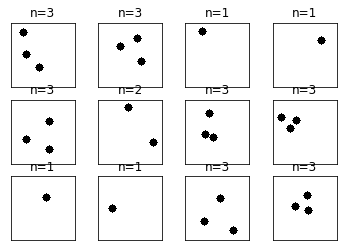

In [5]:
# plot random 12 of the train images
si.plot_12images(images_train, labels_train)

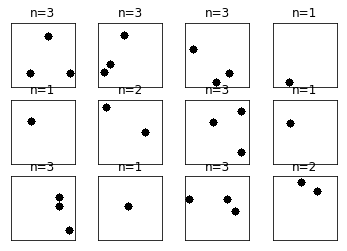

In [6]:
# plot random 12 of the validation images
si.plot_12images(images_val, labels_val)

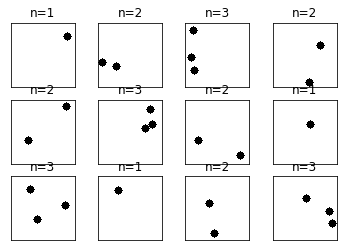

In [7]:
# plot random 12 of the test mages
si.plot_12images(images_test, labels_test)

In [8]:
# parameters of the training
batch_size = 128
num_classes = 3
epochs = 20

# input image dimensions
img_rows, img_cols = 64, 64

In [9]:
# reformatting the data if needed

if keras.backend.image_data_format() == 'channels_first':
    images_train = images_train.reshape(images_train.shape[0], 1, img_rows, img_cols)
    images_val = images_val.reshape(images_val.shape[0], 1, img_rows, img_cols)
    images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

print('images_train shape:', images_train.shape)
print(images_train.shape[0], 'train samples')
print(images_val.shape[0], 'validation samples')
print(images_test.shape[0], 'test samples')

images_train shape: (42000, 64, 64, 1)
42000 train samples
12000 validation samples
6000 test samples


In [10]:
print(labels_train)
print('labels_train shape:', labels_train.shape)
print(type(labels_train))
print(type(labels_train[0]))

[2 1 2 ... 3 2 1]
labels_train shape: (42000,)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [11]:
# convert class vectors to binary class matrices- IS THIS CORRECT??
labels_train = np_utils.to_categorical(labels_train, num_classes=None)
labels_val = np_utils.to_categorical(labels_val, num_classes=None)
labels_test = np_utils.to_categorical(labels_train, num_classes=None)

In [12]:
print(labels_train)
print('labels_train shape:', labels_train.shape)
print(type(labels_train))
print(type(labels_train[0]))

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
labels_train shape: (42000, 4)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
